In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [3]:
train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_y_df = pd.read_csv('./datasets/titanic_gender_submission.csv')

In [4]:
train = train_df[['Pclass', 'Sex', 'Age', 'Survived']]
test = test_df[['Pclass', 'Sex', 'Age']]
test_y = test_y_df['Survived']

In [5]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [6]:
train = train.dropna(axis=0)

In [7]:
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex'] = data

In [8]:
scaler = MinMaxScaler()
data = scaler.fit_transform(train[['Age']])
train['Age'] = data

In [9]:
X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()

lr.fit(X, y)

LogisticRegression()

In [10]:
test = test.fillna(np.mean(test['Age']))

encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex'] = data

scaler = MinMaxScaler()
data = scaler.fit_transform(test[['Age']])
test['Age'] = data

In [11]:
pred = lr.predict(test)

### accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
#### sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
#### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
#### sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
#### sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
#### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
#### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def get_eval(y_test, pred) : 
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print(f'혼동 행렬은 : {matrix}')
    print(f'정확도 : {accuracy}, 재현율 : {recall}, 정밀도 : {precision}, f1_score : {f1score}')

In [13]:
get_eval(test_y, pred)

혼동 행렬은 : [[252  14]
 [ 10 142]]
정확도 : 0.9425837320574163, 재현율 : 0.9342105263157895, 정밀도 : 0.9102564102564102, f1_score : 0.922077922077922


In [14]:
pred_proba = lr.predict_proba(test)

In [15]:
pred = lr.predict(test)

In [16]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [17]:
pred[:5]

array([0, 0, 0, 0, 1])

#### sklearn.metrics.precision_recall_curve¶
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y, pred_proba[:,1])

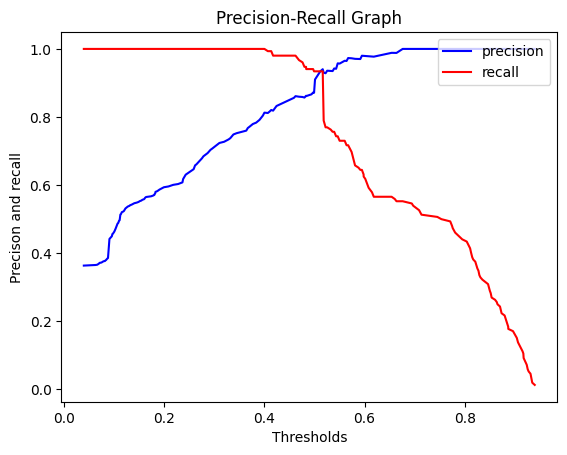

In [19]:
import matplotlib.pyplot as plt

plt.title("Precision-Recall Graph")

plt.xlabel("Thresholds")
plt.ylabel("Precison and recall")
plt.plot(thresholds, precisions[:194], "b", label = "precision")
plt.plot(thresholds, recalls[:194], "r", label = "recall")
plt.legend(loc = "upper right")
plt.show()